In [6]:
import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

keras.datasets.fashion_mnist.load_data()로 패션 MNIST 데이터를 불러옴.

학습용과 테스트용 데이터로 나눔.

학습용 이미지를 255로 나눠 0~1 범위로 정규화.

train_test_split으로 학습 데이터를 80% 학습용, 20% 검증용으로 분리.

이렇게 나눈 데이터로 모델 학습과 검증을 준비

In [7]:
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Input(shape=(28,28)))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

model_fn은 Sequential 모델을 생성


입력층은 28×28 이미지, Flatten으로 1차원 벡터로 변환


은닉층에는 100개 뉴런과 ReLU 활성화 함수를 사용

a_layer가 전달되면 추가 레이어를 삽입


출력층은 10개 뉴런과 Softmax로 클래스 확률을 출력



In [8]:
model = model_fn()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

model_fn()으로 모델 생성


model.summary()로 모델 구조 요약 출력



In [9]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

모델을 sparse categorical crossentropy 손실과 정확도 평가 지표로 컴파일

학습 데이터를 이용해 5회(epoch) 학습 진행

학습 과정 출력은 표시하지 않음(verbose=0)

학습 결과를 history 객체에 저장

In [10]:
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


history.history.keys()로 학습 기록에서 저장된 항목 확인

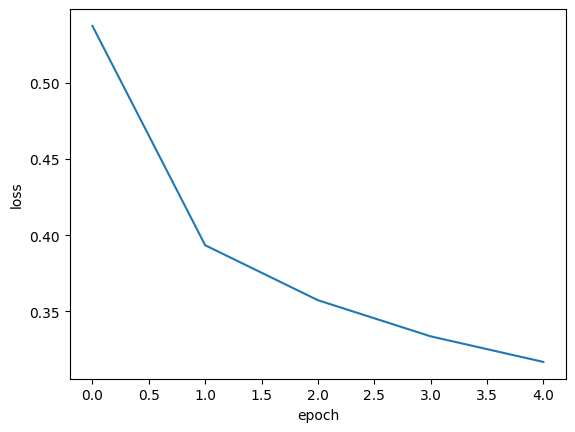

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

history.history['loss']를 사용해 각 epoch별 손실값(loss) 그래프를 그림

x축은 epoch, y축은 loss로 설정

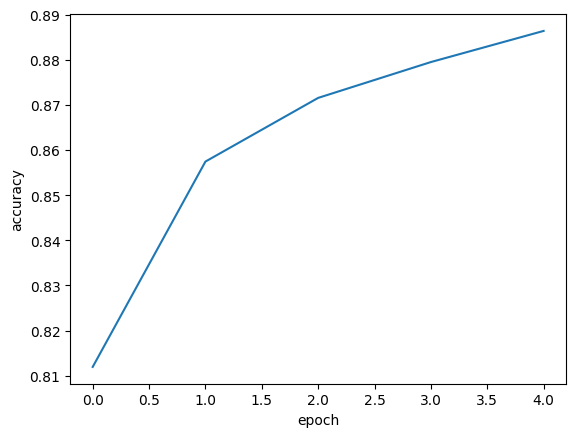

In [12]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

history.history['accuracy']를 사용해 각 epoch별 정확도(accuracy) 그래프를 그림

x축은 epoch, y축은 accuracy로 설정

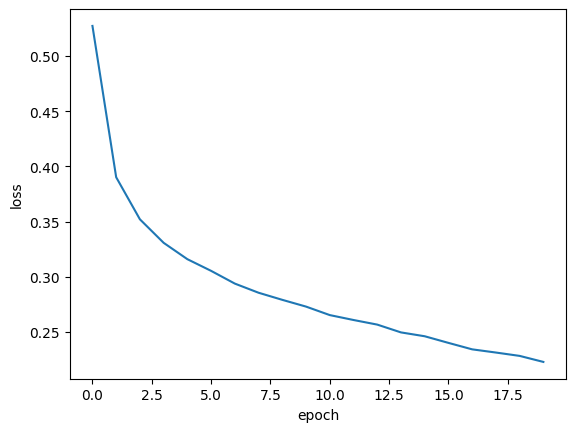

In [13]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

model_fn()으로 새로운 모델 생성

손실 함수는 sparse categorical crossentropy, 평가 지표는 accuracy로 컴파일

학습 데이터를 이용해 20회(epoch) 학습하고 결과를 history에 저장

history.history['loss']를 이용해 epoch별 손실(loss) 그래프 그림

x축은 epoch, y축은 loss로 설정하고 plt.show()로 그래프 표시

In [14]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

model_fn()으로 새로운 모델 생성

손실 함수는 sparse categorical crossentropy, 평가 지표는 accuracy로 컴파일

학습 데이터를 이용해 20회(epoch) 학습하고 결과를 history에 저장

검증 데이터(val_scaled, val_target)를 사용해 각 epoch마다 성능 평가

학습 과정 출력은 verbose=0으로 표시하지 않음

In [15]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


history.history.keys()로 학습 기록에서 저장된 항목 확인

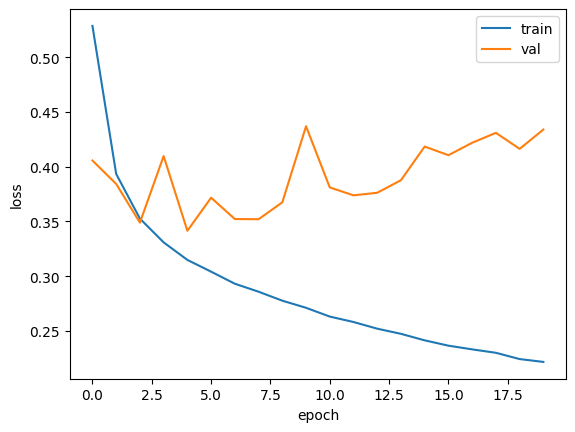

In [16]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

istory.history['loss']와 history.history['val_loss']를 이용해 학습 손실과 검증 손실 그래프를 그림

x축은 epoch, y축은 loss로 설정

label로 학습(train)과 검증(val) 구분

plt.legend()로 범례 표시하고 plt.show()로 그래프 출력

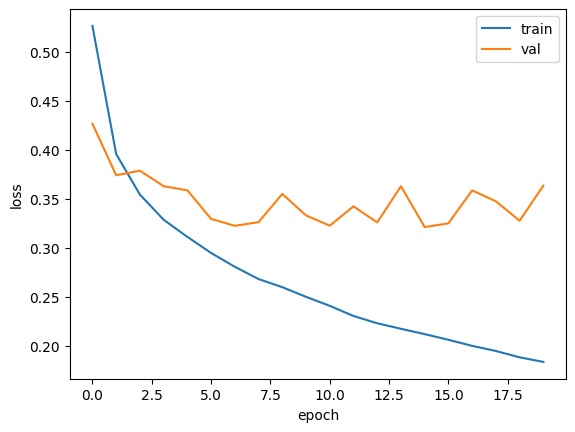

In [17]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

model_fn()으로 새로운 모델 생성


Adam 옵티마이저, sparse categorical crossentropy 손실, 정확도 평가 지표로 모델 컴파일


학습 데이터를 이용해 20회(epoch) 학습하고 검증 데이터로 성능 평가, 결과를 history에 저장


history.history['loss']와 history.history['val_loss']로 학습 손실과 검증 손실 그래프 그림


x축은 epoch, y축은 loss, 범례 표시 후 plt.show()로 그래프 출력



In [18]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

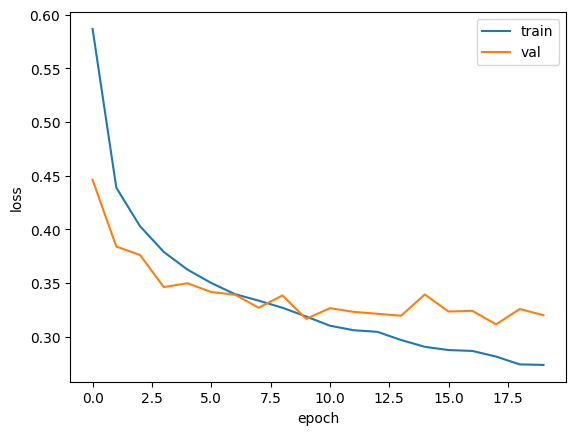

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

history.history['loss'] : 학습 손실 값(epoch별)

history.history['val_loss'] : 검증 손실 값(epoch별)

plt.plot() : 선 그래프 그리기

plt.xlabel('epoch') : x축 레이블

plt.ylabel('loss') : y축 레이블

plt.legend() : 범례 표시

plt.show() : 그래프 출력

In [20]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=11, verbose = 0,
                    validation_data=(val_scaled, val_target))

모델 생성: model_fn() 함수로 Dropout(0.3) 적용한 모델 생성


모델 컴파일: Adam optimizer, sparse categorical crossentropy loss, accuracy metric 설정


모델 학습: 학습 데이터(train_scaled, train_target)로 11 epochs 학습


검증 데이터 사용: validation_data=(val_scaled, val_target)로 학습 중 검증 수행


학습 기록 저장: 학습/검증 손실과 정확도를 history 객체에 기록



In [21]:
model.save('model-whole.keras')
model.save_weights('model.weights.h5')
!ls -al model*

-rw-r--r-- 1 root root 976600 Nov 20 04:59 model.weights.h5
-rw-r--r-- 1 root root 979409 Nov 20 04:59 model-whole.keras


모델 전체 저장: model.save('model-whole.keras') → 모델 구조 + 가중치 + 학습 설정 전체 저장

가중치만 저장: model.save_weights('model.weights.h5') → 가중치(weights)만 저장

파일 확인: !ls -al model* → 현재 디렉터리에 model 관련 파일 목록 출력

In [22]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model.weights.h5')

모델 생성: model_fn() 함수로 Dropout(0.3) 적용한 새로운 모델 생성

가중치 불러오기: model.load_weights('model.weights.h5') → 이전 학습에서 저장한 가중치 적용

In [23]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
0.8781666666666667


model.predict(val_scaled) → 검증 데이터에 대한 클래스 확률 예측
np.argmax(..., axis=-1) → 각 샘플에서 가장 높은 확률을 가진 클래스 선택
val_labels 변수에 정수형 레이블로 저장
val_labels == val_target → 예측과 실제 레이블 비교, np.mean()으로 평균 계산
검증 데이터에서 모델의 분류 정확도(accuracy) 출력

In [24]:
model = keras.models.load_model('model-whole.keras')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8789 - loss: 0.3355


[0.3382458984851837, 0.878166675567627]

keras.models.load_model('model-whole.keras'): 전체 저장된 모델(구조 + 가중치 + 학습 설정) 로드

검증 데이터 준비: val_scaled, val_target 사용

모델 평가: model.evaluate(val_scaled, val_target) 손실(loss)과 정확도(metrics) 계산

결과 반환: 평가 결과는 [loss, accuracy] 형태로 반환

In [25]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',
                                                save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [26]:
model = keras.models.load_model('best-model.keras')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8884 - loss: 0.3138


[0.3167673945426941, 0.8879166841506958]

keras.models.load_model('best_model.keras'): 저장된 전체 모델(구조 + 가중치 + 학습 설정) 불러오기

model.evaluate(val_scaled, val_target):
 검증 데이터로 모델 성능(손실과 정확도) 평가

In [27]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

model_fn 함수로 Dropout 0.3 적용한 새로운 모델 생성

Adam optimizer 사용

다중 클래스 분류용 손실(sparse_categorical_crossentropy) 설정

학습 중 정확도(metrics) 계산
모델 저장 콜백

검증 데이터 성능이 가장 좋을 때만 'best-model.keras'로 저장

학습 데이터로 20 epochs 학습

검증 데이터 사용 → 과적합 확인

callbacks=[checkpoint_cb] → 학습 중 가장 좋은 모델 자동 저장

In [28]:
print(early_stopping_cb.stopped_epoch)

13


훈련 마치고 몇번째 에포크에서 훈련 중지 돼있는지 확인

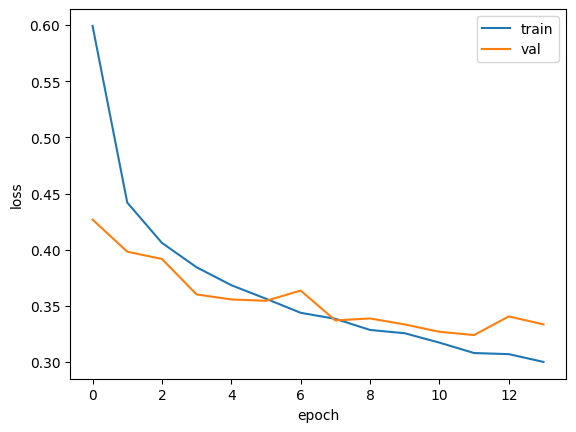

In [29]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

history.history['loss']와 history.history['val_loss']를 plt.plot()으로 각각 선 그래프로 표시하고, label로 범례 지정

plt.xlabel('epoch'), plt.ylabel('loss')로 x축(에폭)과 y축(손실) 레이블 지정

plt.legend()로 train/val 범례 추가, plt.show()로 화면에 그래프 출력하여 학습 상태 시각적으로 확인

In [30]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8846 - loss: 0.3222


[0.3240596055984497, 0.8824166655540466]

model.evaluate(val_scaled, val_target) → 검증 데이터(val_scaled, val_target)를 사용해 모델 성능 평가

반환값: [loss, accuracy] 형태로 손실(loss)과 정확도(metrics) 확인 가능

목적: 학습 완료 모델이 검증 데이터에서 얼마나 잘 예측하는지 확인